In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
go_file1 = '../datasets/goemotions_1.csv'
go_file2 = '../datasets/goemotions_2.csv'
go_file3 = '../datasets/goemotions_3.csv'

In [4]:
go1_df = pd.read_csv(go_file1)
go2_df = pd.read_csv(go_file2)
go3_df = pd.read_csv(go_file3)

In [6]:
go_df = pd.concat([go1_df, go2_df, go3_df])

In [7]:
go_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211225 entries, 0 to 71224
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   text                  211225 non-null  object 
 1   id                    211225 non-null  object 
 2   author                211225 non-null  object 
 3   subreddit             211225 non-null  object 
 4   link_id               211225 non-null  object 
 5   parent_id             211225 non-null  object 
 6   created_utc           211225 non-null  float64
 7   rater_id              211225 non-null  int64  
 8   example_very_unclear  211225 non-null  bool   
 9   admiration            211225 non-null  int64  
 10  amusement             211225 non-null  int64  
 11  anger                 211225 non-null  int64  
 12  annoyance             211225 non-null  int64  
 13  approval              211225 non-null  int64  
 14  caring                211225 non-null  int64  
 15  confus

In [8]:
# Drop unimportnt columns
go_df.drop(columns={'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id'}, inplace=True)

In [9]:
go_df.example_very_unclear.value_counts()

example_very_unclear
False    207814
True       3411
Name: count, dtype: int64

In [10]:
go_df = go_df[go_df.example_very_unclear == False]

In [11]:
go_df.head()

,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,"You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,False,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Right? Considering it’s such an important docu...,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71219,"Well, I'm glad you're out of all that now. How...",False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71220,Everyone likes [NAME].,False,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
71221,Well when you’ve imported about a gazillion of...,False,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
71222,That looks amazing,False,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Look for duplicates since we concatenated 3 files

go_df.duplicated().sum()

56410

In [13]:
go_df.drop_duplicates(subset=['text'], inplace=True)

go_df.duplicated().sum()

0

In [22]:
go_df

,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,"You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,False,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Right? Considering it’s such an important docu...,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71088,I didn’t even notice that one. I noticed the b...,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
71094,"Thanks, [NAME]",False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71095,Everyone likes [NAME].,False,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
71138,Projecting pretty hard here.,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
# Calculate max, mean, and median sentence lengths

maxLen = 0

for text in go_df.text:
  # Check if text entry is a string
  words = text.split()
  maxLen = max(maxLen, len(words))

print(f'Max sentence len: {maxLen}')

Max sentence len: 33


In [24]:
for cols in go_df.iloc[:, 2:]:
  print(f'{cols}:'.ljust(18) + f'{go_df[cols].sum()}') # --> imbalanced. should try to balance it?

admiration:       4874
amusement:        2684
anger:            2242
annoyance:        3534
approval:         4898
caring:           1611
confusion:        2023
curiosity:        2808
desire:           1014
disappointment:   2193
disapproval:      3106
disgust:          1368
embarrassment:    637
excitement:       1558
fear:             891
gratitude:        3468
grief:            180
joy:              2205
love:             2370
nervousness:      489
optimism:         2448
pride:            354
realization:      2385
relief:           372
remorse:          714
sadness:          1851
surprise:         1528
neutral:          15803


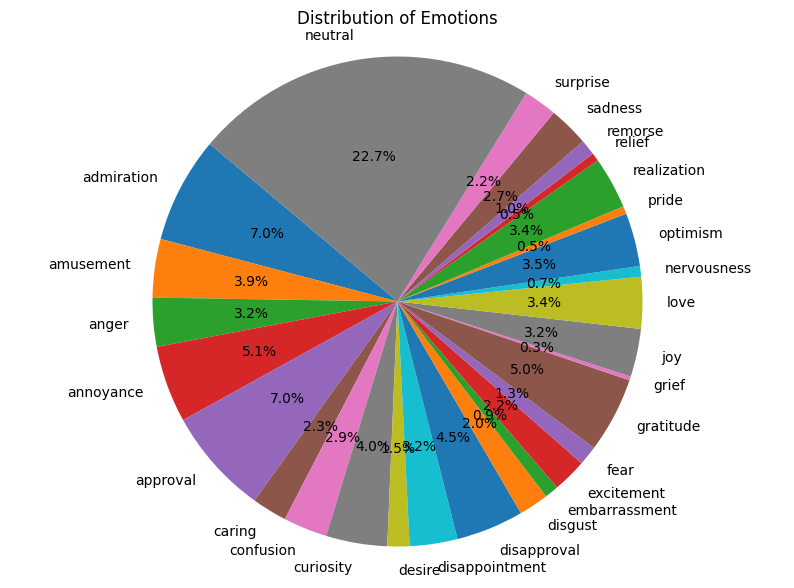

In [25]:
# Pie plot of the emotion distribution
values = go_df.iloc[:, 2:].values

# Sum the values along the rows axis to get the total count for each emotion
emotion_counts = values.sum(axis=0)

emotion_labels = go_df.columns[2:]

plt.figure(figsize=(10, 7))
plt.pie(
    emotion_counts,
    labels=emotion_labels,
    autopct='%1.1f%%',
    startangle=140)
plt.title('Distribution of Emotions')
plt.axis('equal');

In [26]:
#import the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [27]:
text = go_df['text'].values
emotions = go_df.drop(columns=['text', 'example_very_unclear']).values

In [29]:
text

array(['That game hurt.',
       "You do right, if you don't care then fuck 'em!",
       'Man I love reddit.', ..., 'Everyone likes [NAME].',
       'Projecting pretty hard here.',
       'I just called the Capitol Police. They are not affected by the shutdown. [NAME] is fucking full of shit.'],
      dtype=object)

In [30]:
emotions

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Tokenize and pad text

In [32]:
max_words = 10000
max_seq = 50

# Tokenize the data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)

# Pad the sequences
X = pad_sequences(sequences, maxlen=max_seq)
y = emotions

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Build the Neural Network

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_seq),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(28, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1316/1444 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.2444 - loss: 0.1961

KeyboardInterrupt: 

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')